# VaR by Monte Carlo Simulation

1. Install necessary libraries 
2. Define parameters (time range, tickers, portfolio value, simulations, confidence interval)
3. Download adjusted close prices (accounting for dividends and stock splits) 
4. Calculate daily log returns 
5. Define functions for expected return and standard deviation 
6. Calculate portfolio metrics (covariance matrix & equally weighted portfolio)
7. Define function for portfolio gain/loss in each scenario 
8. Run Monte Carlo simulations 
9. Calculate VaR
10. Plot the Results 

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Define parameters
years = 15
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365 * years)
tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']
portfolio_value = 1000000
simulations = 10000
days = 5
confidence_interval = 0.95

In [3]:
# Download adjusted close prices (accounting for dividends and stock splits)
adj_close_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start=startDate, end=endDate)
    adj_close_df[ticker] = data['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Calculate daily log returns
log_returns = np.log(adj_close_df / adj_close_df.shift(1)).dropna()

In [5]:
# Define functions for expected return and standard deviation
def expected_return(weights, returns):
    return np.sum(returns.mean() * weights)

def standard_deviation(weights, cov_matrix):
    return np.sqrt(weights.T @ cov_matrix @ weights)

In [6]:
# Calculate portfolio metrics
cov_matrix = log_returns.cov()
weights = np.array([1/len(tickers)] * len(tickers))
portfolio_exp_return = expected_return(weights, log_returns)
portfolio_std_dev = standard_deviation(weights, cov_matrix)

In [7]:
# Define function for portfolio gain/loss in each scenario
def scenario_gain_loss(value, exp_return, std_dev, z_score, num_days):
    return value * exp_return * num_days + value * std_dev * z_score * np.sqrt(num_days)

In [8]:
# Run Monte Carlo simulations
scenarioReturns = [scenario_gain_loss(portfolio_value, portfolio_exp_return, portfolio_std_dev, np.random.normal(0, 1), days) for _ in range(simulations)]

In [9]:
# Calculate VaR
VaR = -np.percentile(scenarioReturns, 100 * (1 - confidence_interval))
VaR

27010.324301458557

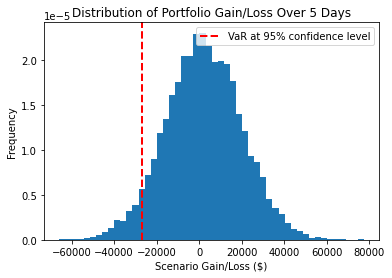

In [10]:
# Plot the results
plt.hist(scenarioReturns, bins=50, density=True)
plt.xlabel('Scenario Gain/Loss ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio Gain/Loss Over {days} Days')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()